In [1]:
from llama_index.core.workflow import StartEvent, StopEvent, Workflow, step


class MyWorkflow(Workflow):
    @step
    async def my_step(self, ev: StartEvent) -> StopEvent:
        # do something here
        return StopEvent(result="Hello, world!")


w = MyWorkflow(timeout=10, verbose=False)
result = await w.run()

In [2]:
print(result)  # Should print: Hello, world!

Hello, world!


### What is an AI Agent?

- An AI agent is a system or software program that can interact (autonomously or semi-autonomously or rule based) with it's environment, gather data and use that data to make decisions and take actions to achieve specific goals.
- These agents can be deployed or used in various applications to solve complex tasks in various enterprise contexts from software design and IT automation to code-generation tools and conversational assistants. 

#### Key characteristics for AI capabilities
- An agent can perform autonomous actions without constant human intervention. Also, they can have a human in the loop to maintain control.
- Agents have a memory to store individual preferences and allow for personalization. It can also store knowledge. An LLM can undertake information processing and decision-making functions.
- Agents must be able to perceive and process the information available from their environment.
- Agents can also use tools such as accessing the internet, using code interpreters and making API calls.
- Agents can also collaborate with other agents or humans.


#### High level types of AI agents
- Single Agent
- Multi Agent
- Human Machine Agent

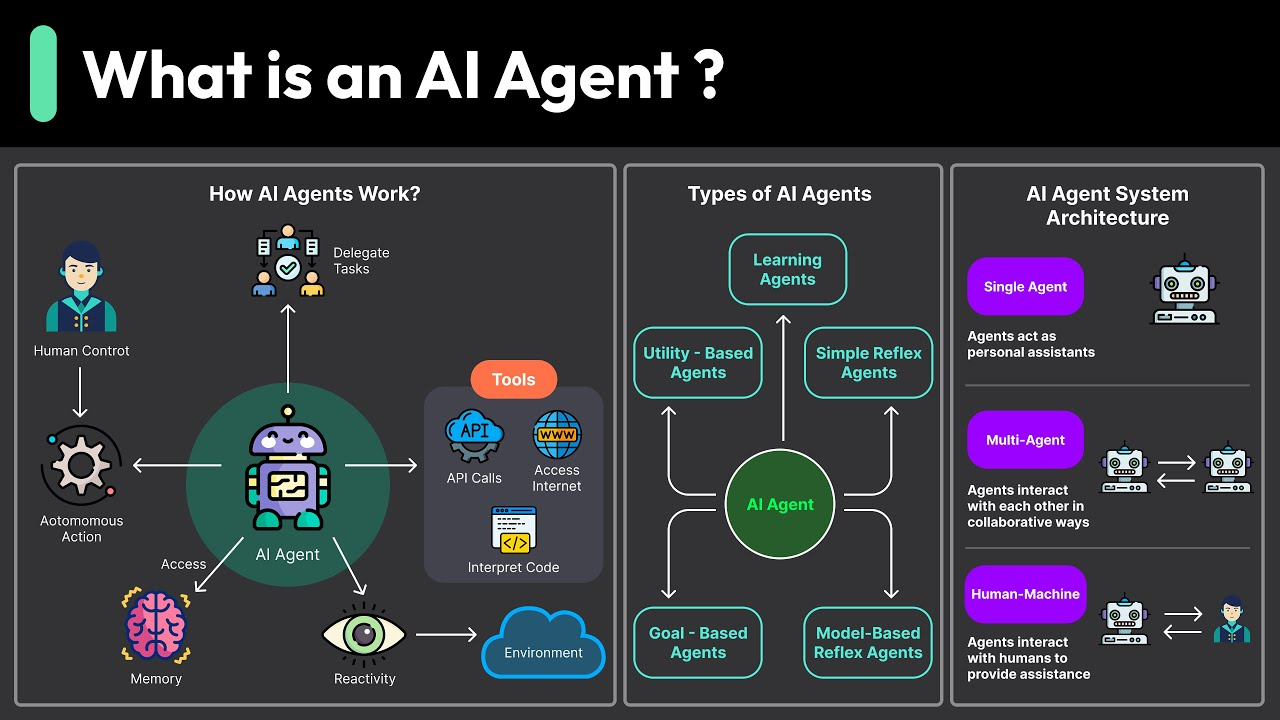



#### Task specific agents

Task-specific agents are designed to perform a single, well-defined function. Examples include data extraction, summarization, or code generation. In LlamaIndex, you can define custom agents for each task and compose them into larger workflows.



#### More on Task-Specific Agents

Task-specific agents are specialized AI agents designed to perform a single, well-defined function. They are the building blocks of larger agentic systems and can be composed or orchestrated by router agents or workflows.

**Why use task-specific agents?**
- Modularity: Each agent is responsible for a single task, making the system easier to maintain and extend.
- Reusability: Agents can be reused in different workflows or combined for more complex tasks.
- Reliability: Focused agents are easier to test and validate.

**Types of Task-Specific Agents:**
- Data Extraction Agent: Extracts structured data from unstructured sources.
- Summarization Agent: Produces concise summaries of long texts.
- Code Generation Agent: Writes code based on user prompts.
- Retrieval Agent: Finds relevant documents or information from a database or knowledge base.
- Classification Agent: Assigns categories or labels to data.

**Example Use Cases:**
- Summarizing meeting transcripts
- Generating SQL queries from natural language
- Extracting entities from legal documents
- Writing Python functions from user instructions

---
#### Example: Summarization Agent with LlamaIndex


In [3]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

True

In [4]:
# Required dependencies
import nest_asyncio

nest_asyncio.apply()

from llama_index.llms.openai import OpenAI


from llama_index.core.workflow import StartEvent, StopEvent, Event, Workflow, step

llm = OpenAI(
    model="gpt-4o-mini",
    api_key = os.getenv("OPENAI_API_KEY"),  # uses OPENAI_API_KEY env var by default

    # api_key="some key",  # uses OPENAI_API_KEY env var by default
)


class FileSummarizationWorkflow(Workflow):
    @step
    async def read_file(self, ev: StartEvent) -> Event:
        file_path = ev.input  # expects a file path as input
        with open(file_path, "r", encoding="utf-8") as f:
            content = f.read()
        return Event(payload={"text": content})

    @step
    async def summarize(self, ev: Event) -> StopEvent:
        text = ev.payload["text"]
        prompt = f"Summarize the following text in 5 sentences:\n\n{text}"
        response = await llm.acomplete(prompt)
        return StopEvent(result=response.text)


# Usage
workflow = FileSummarizationWorkflow(timeout=10, verbose=True)
file_path = r"D:/Ventures/AI_session/understanding-ai-agents/dependency_files/sample.txt"  # Replace this with an actual file path on your machine

# Run the workflow
result = await workflow.run(input=file_path)
print("\nSummary:\n", result)

Running step read_file
Step read_file produced event Event
Running step summarize
Step summarize produced event StopEvent

Summary:
 AI agents are advanced software systems that utilize artificial intelligence to autonomously pursue goals and complete tasks for users, demonstrating reasoning, planning, and memory capabilities. They can process various types of information simultaneously and adapt over time, allowing them to facilitate complex workflows and collaborate with other agents. Key features of AI agents include reasoning, acting, observing, planning, collaborating, and self-refining, which enable them to operate effectively in diverse environments. In contrast to AI assistants and bots, AI agents possess a higher degree of autonomy and are designed to handle more complex tasks, while assistants require user input and bots follow pre-defined rules. Despite their benefits, AI agents face challenges in tasks requiring deep empathy, ethical decision-making, and adaptability in unp